In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import gc

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [39]:
#links
#https://drive.google.com/file/d/1lUeQwuLqOVKkVt69KfJCiYuuXdjlKiAw/view?usp=sharing
#https://www.bbva.pe/personas/data-challenge.html

In [3]:
%%time
path0 = '/kaggle/input/databbva2023/archive/'
train = pd.read_csv(f'{path0}universe_train.csv')
test = pd.read_csv(f'{path0}universe_test.csv')
test['attrition'] = -1
universe = pd.concat([train , test[train.columns]])
print(universe.period.value_counts(1).sort_index())
print(train.shape, test.shape, universe.shape)

universe = universe.sample(frac = .2, random_state = 123)

print(train.shape, test.shape, universe.shape)

universe.head()

period
period_1    0.106263
period_2    0.107940
period_3    0.109931
period_4    0.112305
period_5    0.113070
period_6    0.112493
period_7    0.111557
period_8    0.111922
period_9    0.114519
Name: proportion, dtype: float64
(535943, 3) (273636, 3) (809579, 3)
(535943, 3) (273636, 3) (161916, 3)
CPU times: user 1.57 s, sys: 262 ms, total: 1.83 s
Wall time: 2.23 s


,ID,attrition,period
438192,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2
21441,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9
92583,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6
75505,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9
208516,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4


In [6]:
universe.value_counts(['period','attrition']).unstack()

attrition,-1,0,1,2,3,4,5
period,,,,,,,
period_1,NaN,15070.0,1460.0,162.0,100.0,220.0,250.0
period_2,NaN,15236.0,1554.0,196.0,109.0,238.0,267.0
period_3,NaN,15578.0,1435.0,169.0,103.0,214.0,258.0
period_4,NaN,15582.0,1579.0,209.0,121.0,215.0,286.0
period_5,NaN,15737.0,1583.0,219.0,137.0,223.0,362.0
period_6,NaN,15673.0,1749.0,192.0,122.0,257.0,314.0
period_7,17817.0,NaN,NaN,NaN,NaN,NaN,NaN
period_8,18200.0,NaN,NaN,NaN,NaN,NaN,NaN
period_9,18720.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='period'>

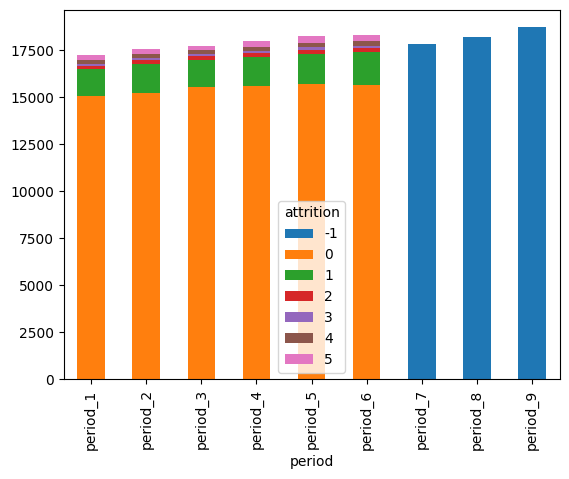

In [10]:
universe.value_counts(['period','attrition'] ).unstack().plot.bar(stacked = True)

## Balances

In [11]:
path = f'{path0}balances.csv'
path

'/kaggle/input/databbva2023/archive/balances.csv'

In [12]:
%%time
!free -h
df = pd.read_csv(path, sep = ',')
!free -h
print(df.shape)
df = df.loc[ df.ID.isin(universe.ID) ]
print(df.shape)
!free -h
# i1 = df.type.isin(['type_2','type_1'])
# df.loc[i1, 'type'] = 'type_12'
# i1 = df['product'].isin(['product_3','product_5','product_7'])
# df.loc[i1, 'product'] = 'product_357'
i1 = (df.type == 'type_3' ) & (df['product']=='product_1')
df.loc[i1, 'type_prod'] = 't3p1'

i1 = (df.type == 'type_3' ) & (df['product']=='product_2')
df.loc[i1, 'type_prod'] = 't3p2'

i1 = (df.type == 'type_5' ) & (df['product']=='product_6')
df.loc[i1, 'type_prod'] = 't5p6'

i1 = (df.type == 'type_7' ) & (df['product']=='product_2')
df.loc[i1, 'type_prod'] = 't7p2'

i1 = (df.type == 'type_7' ) & (df['product']=='product_4')
df.loc[i1, 'type_prod'] = 't7p4'

i1 = (df.type == 'type_4' ) & (df['product']=='product_2')
df.loc[i1, 'type_prod'] = 't4p2'

i1 = (df.type == 'type_4' ) & (df['product']=='product_4')
df.loc[i1, 'type_prod'] = 't4p4'

df.type_prod.fillna('t12347_p24357', inplace = True ) 

df.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       1.1Gi        24Gi       0.0Ki       5.7Gi        29Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.8Gi        21Gi       0.0Ki       6.9Gi        28Gi
Swap:            0B          0B          0B
(11597785, 8)
(2314409, 8)
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.3Gi        22Gi       0.0Ki       6.9Gi        28Gi
Swap:            0B          0B          0B
CPU times: user 40 s, sys: 5.38 s, total: 45.4 s
Wall time: 57.5 s


,month,ID,type,product,entity,balance_amount,days_default,period,type_prod
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5,t7p2
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5,t7p2
13,11,302c4da6011b8f52d78d71940bbb3e9b098ba40a6c484d...,type_7,product_4,entity_2,3.3313,5.0,period_5,t7p4
26,6,7de0cb716ba4c5c3324bde40c50245003e333b9acfe6b3...,type_3,product_2,entity_5,4.2863,5.0,period_5,t3p2
35,3,ace211b363d26a9407ccbbeed5710b97fca55799d261b8...,type_3,product_2,entity_3,4.2980,0.0,period_5,t3p2


In [13]:
df.value_counts(['type','product']).unstack()

product,product_1,product_2,product_3,product_4,product_5,product_6,product_7
type,,,,,,,
type_1,NaN,NaN,NaN,NaN,NaN,NaN,409.0
type_2,NaN,1172.0,12.0,1172.0,624.0,NaN,13.0
type_3,1242543.0,716574.0,NaN,NaN,NaN,NaN,NaN
type_4,NaN,39885.0,27.0,39748.0,439.0,NaN,6.0
type_5,NaN,NaN,NaN,NaN,NaN,118442.0,NaN
type_7,NaN,76673.0,2.0,76514.0,136.0,NaN,18.0


In [14]:
df.value_counts(['type','product'])

type    product  
type_3  product_1    1242543
        product_2     716574
type_5  product_6     118442
type_7  product_2      76673
        product_4      76514
type_4  product_2      39885
        product_4      39748
type_2  product_4       1172
        product_2       1172
        product_5        624
type_4  product_5        439
type_1  product_7        409
type_7  product_5        136
type_4  product_3         27
type_7  product_7         18
type_2  product_7         13
        product_3         12
type_4  product_7          6
type_7  product_3          2
Name: count, dtype: int64

In [15]:
df[df.ID==df.ID.iloc[0]]

,month,ID,type,product,entity,balance_amount,days_default,period,type_prod
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0000,period_5,t7p2
4225,2,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_3,product_1,entity_1,3.0754,0.0000,period_5,t3p1
4818,8,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4373,4.5007,period_5,t7p2
54456,6,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_4,entity_1,3.6687,4.3619,period_5,t7p4
240832,9,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_4,entity_1,3.5700,4.5654,period_5,t7p4
311604,5,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4990,0.0000,period_5,t7p2
324039,3,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_3,product_1,entity_1,3.3124,0.0000,period_5,t3p1
370463,11,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_3,product_1,entity_1,3.2451,0.0000,period_5,t3p1
372418,12,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_3,product_2,entity_2,4.1745,4.7439,period_5,t3p2
633539,9,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,4.5654,period_5,t7p2


In [16]:
%%time
!free -h
print(df.shape)
pivot = 'type_prod'
historia = 6
cal = [ 'mean', 'max', 'min', 'std']

def varRCC(data , historia = 12 , pivot =  'type_prod',  cal = ['mean']):
    print('*'*200)
    !free -h
    df1 = data.groupby(["month", "ID", pivot, 'period'])[['balance_amount', 'days_default']].agg(
        {'balance_amount':sum, 'days_default':max }).unstack(level=2 )
    df1.columns = [x[1]+'_' + x[0]  for x in df1.columns]
    cols =  list(df1.columns)
    df1.reset_index(inplace = True)
    print(df1.shape)
    #!free -h
    #print((df1.isna().sum()/df1.shape[0]).sort_values())
    #print(df1.head())
    col_drop = ['month', 'ID', 'period']
    
    if pivot == 'type_prod':
        cols_tipbal = ['t12347_p24357_balance_amount', 't3p1_balance_amount', 't3p2_balance_amount', 't4p2_balance_amount',
               't4p4_balance_amount', 't5p6_balance_amount', 't7p2_balance_amount',   't7p4_balance_amount']
        df1['type_prod_balance_amount_suma'] =df1[cols_tipbal].sum(axis =1 )

        for c in cols_tipbal:
            df1[c+'_rat'] = df1[c]/df1['type_prod_balance_amount_suma']
        
        cols = [c for c in df1.columns if c not in col_drop]
    elif pivot =='entity':
        cols_tipbal = [ 'entity_1_balance_amount',
               'entity_2_balance_amount', 'entity_3_balance_amount',
               'entity_4_balance_amount', 'entity_5_balance_amount' ]
        df1['entity_balance_amount_suma'] =df1[cols_tipbal].sum(axis =1 )

        for c in cols_tipbal:
            df1[c+'_rat'] = df1[c]/df1['entity_balance_amount_suma']   
        cols = [c for c in df1.columns if c not in col_drop]
    ################################################################
    dz = (df1.isna().sum()/df1.shape[0]).sort_values()
    colnan = list(dz[dz<.6].index) #60% nulos 
    #print('primer criterio de nulos' , len(colnan), df1.shape )
    #df1 = df1[colnan]
    
    col_bal = [ c for c in colnan if  'balance_amount' in c]
    #print( ' # columnas balances: ', len(col_bal))
    #print(col_bal)



    col_drop = ['month', 'ID', 'period']


    dfsh = df1[col_drop + col_bal].copy()
    dfsh['month'] = dfsh['month'] + 1


    dfsh.columns = col_drop + [c + '_sh' for c in col_bal]
    df1 = df1.merge(dfsh, on = col_drop, how = 'left')
    del dfsh


    for c in col_bal:
        df1[c + '_diff'] = df1[c]-df1[c+'_sh']
        df1[c + '_1sh'] = df1[c]/df1[c+'_sh']

    colfin = [c for c in df1.columns if '_sh' not in c]
    coldrop = [c for c in df1.columns if '_sh'  in c]

    #df1[colfin].head()

    dz = (df1[colfin].isna().sum()/df1.shape[0]).sort_values()
    colfin2 = list(dz[dz<.6].index) #0.6% nulos 
    colfin2 = [c for c in colfin2 if c not in ['ID', 'period', 'month'] ]
    #colfin2 = [c for c in colfin2 if c != 'month']
    #print( 'col nuevas balances' , len(colfin),'col con menos nulos', len(colfin2))
    #!free -h
    #######################################################################################################################   
    print(colfin2)
    rcc_amount_days = df1[df1['month'] >= 12 - historia + 1].groupby(['ID', 'period'])[colfin2].agg(cal )
    del df1
    rcc_amount_days.columns = [ 'rcc_'+ x[0]+'_' + x[1] + '_' + str(historia) for x in rcc_amount_days.columns]


    #print( 'columnas agregadas', rcc_amount_days.shape)
    dz = (rcc_amount_days.isna().sum()/rcc_amount_days.shape[0]).sort_values()
    #print(dz.head(20))
    colf = list(dz[dz<.90].index) #90% nulos 
    #print( 'columnas agregadas con menos nulos', len( colf ))
    #rcc_amount_days = 
    #print(colf)
    #!free -h
    return rcc_amount_days[colf].reset_index()
#rcc_amount_days.head()


              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.4Gi        22Gi       0.0Ki       6.9Gi        28Gi
Swap:            0B          0B          0B
(2314409, 9)
CPU times: user 2.2 ms, sys: 28 ms, total: 30.2 ms
Wall time: 1.15 s


In [21]:
df.period.unique()

array(['period_5', 'period_8', 'period_6', 'period_4', 'period_7',
       'period_3', 'period_2', 'period_1', 'period_9'], dtype=object)

In [17]:
%%time

dfu = varRCC(df, historia = 12 , pivot =  'type_prod',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] )
dfu.head()

********************************************************************************************************************************************************************************************************
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.4Gi        22Gi       0.0Ki       6.9Gi        28Gi
Swap:            0B          0B          0B
(1061158, 19)
['type_prod_balance_amount_suma', 'type_prod_balance_amount_suma_1sh', 'type_prod_balance_amount_suma_diff', 't3p1_balance_amount', 't3p1_balance_amount_rat', 't3p1_days_default', 't3p1_balance_amount_rat_1sh', 't3p1_balance_amount_1sh', 't3p1_balance_amount_diff', 't3p1_balance_amount_rat_diff', 't3p2_balance_amount', 't3p2_days_default', 't3p2_balance_amount_rat', 't3p2_balance_amount_rat_1sh', 't3p2_balance_amount_rat_diff', 't3p2_balance_amount_1sh', 't3p2_balance_amount_diff']
CPU times: user 9.79 s, sys: 997 ms, total: 10.8 s
Wall time: 11.9 s


,ID,period,rcc_type_prod_balance_amount_suma_mean_12,rcc_t3p2_balance_amount_1sh_sum_12,rcc_t3p2_balance_amount_rat_diff_sum_12,rcc_t3p2_balance_amount_rat_1sh_sum_12,rcc_t3p2_balance_amount_rat_sum_12,rcc_t3p2_days_default_sum_12,rcc_t3p2_balance_amount_sum_12,rcc_t3p1_balance_amount_rat_diff_sum_12,...,rcc_t3p2_balance_amount_rat_1sh_mean_12,rcc_t3p2_balance_amount_rat_diff_min_12,rcc_t3p2_balance_amount_rat_diff_max_12,rcc_t3p2_balance_amount_rat_diff_mean_12,rcc_t3p2_balance_amount_rat_1sh_min_12,rcc_t3p2_balance_amount_rat_1sh_max_12,rcc_t3p2_balance_amount_1sh_std_12,rcc_t3p2_balance_amount_rat_1sh_std_12,rcc_t3p2_balance_amount_rat_diff_std_12,rcc_t3p2_balance_amount_diff_std_12
0,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,period_5,2.385600,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000ea50ef1d2668ff8ca5f5f0a35bac3a3bf3192ef50d...,period_3,6.077967,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000f505832ad926947159b6261494ad259534d5ef9858...,period_6,15.053008,10.668434,-0.088418,10.798621,4.866395,0.0,73.8262,0.037852,...,0.981693,-0.074834,0.007654,-0.008038,0.825379,1.02167,0.081415,0.052706,0.022461,0.538696
3,0001110f8a89588fcc69ba47e95c4c358c43891b979122...,period_7,3.300171,3.820941,0.000000,4.000000,5.000000,0.0,18.3821,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.051325,0.000000,0.000000,0.217732
4,0001789c54a84f7369ccc41261b27565fec2d85c49bdaa...,period_4,1.764800,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# !free -h

# universe =  universe0.copy()
# !free -h
# universe.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       4.0Gi        20Gi       0.0Ki       7.0Gi        26Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       4.0Gi        20Gi       0.0Ki       7.0Gi        26Gi
Swap:            0B          0B          0B


,ID,attrition,period
438192,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2
21441,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9
92583,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6
75505,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9
208516,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4


In [18]:
!free -h

universe0 =  universe.copy()
!free -h
universe0.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.7Gi        21Gi       0.0Ki       6.9Gi        28Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.7Gi        21Gi       0.0Ki       6.9Gi        28Gi
Swap:            0B          0B          0B


,ID,attrition,period
438192,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2
21441,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9
92583,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6
75505,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9
208516,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4


In [19]:
%%time
universe = universe.merge(varRCC(df, historia = 12 , pivot =  'type_prod',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df, historia = 9 , pivot =  'type_prod',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df, historia = 6 , pivot =  'type_prod',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df, historia = 3 , pivot =  'type_prod',  cal  = [ 'mean', 'sum'] ), 
              how='left', on = ['ID', 'period'] )

universe = universe.merge(varRCC(df, historia = 12 , pivot =  'entity',  cal  = [ 'mean', 'max', 'min', 'std', 'sum']), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df, historia = 9 , pivot =  'entity',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df, historia = 6 , pivot =  'entity',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df, historia = 3 , pivot =  'entity',  cal  = [ 'mean', 'sum'] ), 
              how='left', on = ['ID', 'period'] )


universe = universe.merge(varRCC(df, historia = 1 , pivot =  'entity',  cal  = [ 'mean'] ), 
              how='left', on = ['ID', 'period'] )


universe = universe.merge(varRCC(df, historia = 1 , pivot =  'type_prod',  cal  = [ 'mean'] ), 
              how='left', on = ['ID', 'period'] )

universe.head()

********************************************************************************************************************************************************************************************************
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.6Gi        21Gi       0.0Ki       6.9Gi        28Gi
Swap:            0B          0B          0B
(1061158, 19)
['type_prod_balance_amount_suma', 'type_prod_balance_amount_suma_1sh', 'type_prod_balance_amount_suma_diff', 't3p1_balance_amount', 't3p1_balance_amount_rat', 't3p1_days_default', 't3p1_balance_amount_rat_1sh', 't3p1_balance_amount_1sh', 't3p1_balance_amount_diff', 't3p1_balance_amount_rat_diff', 't3p2_balance_amount', 't3p2_days_default', 't3p2_balance_amount_rat', 't3p2_balance_amount_rat_1sh', 't3p2_balance_amount_rat_diff', 't3p2_balance_amount_1sh', 't3p2_balance_amount_diff']
**********************************************************************************************

,ID,attrition,period,rcc_type_prod_balance_amount_suma_mean_12,rcc_t3p2_balance_amount_1sh_sum_12,rcc_t3p2_balance_amount_rat_diff_sum_12,rcc_t3p2_balance_amount_rat_1sh_sum_12,rcc_t3p2_balance_amount_rat_sum_12,rcc_t3p2_days_default_sum_12,rcc_t3p2_balance_amount_sum_12,...,rcc_t3p1_balance_amount_diff_mean_1,rcc_t3p1_balance_amount_rat_1sh_mean_1,rcc_t3p1_balance_amount_1sh_mean_1,rcc_t3p2_balance_amount_mean_1,rcc_t3p2_days_default_mean_1,rcc_t3p2_balance_amount_rat_mean_1,rcc_t3p2_balance_amount_1sh_mean_1,rcc_t3p2_balance_amount_rat_1sh_mean_1,rcc_t3p2_balance_amount_rat_diff_mean_1,rcc_t3p2_balance_amount_diff_mean_1
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,5.376600,4.144361,-0.009354,3.992651,2.790848,0.0000,16.9925,...,0.2389,1.039921,1.076056,3.1803,0.0,0.484780,0.994186,0.960800,-0.019779,-0.0186
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,7.544500,5.000000,0.000000,5.000000,2.697197,24.1504,20.3490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,5.007125,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,15.664975,6.985421,0.012898,7.023257,4.436071,0.0000,69.4845,...,NaN,NaN,NaN,8.6183,0.0,0.562083,0.997512,1.005468,0.003057,-0.0215


In [21]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

X_train.head()

period                                           0.000000
rcc_type_prod_balance_amount_suma_diff_sum_12    0.000000
rcc_type_prod_balance_amount_suma_1sh_sum_12     0.000000
rcc_entity_balance_amount_suma_mean_12           0.000000
rcc_entity_3_balance_amount_diff_sum_12          0.000000
                                                   ...   
rcc_t3p2_balance_amount_rat_mean_1               0.494268
rcc_t3p2_balance_amount_1sh_mean_1               0.511547
rcc_t3p2_balance_amount_rat_1sh_mean_1           0.511547
rcc_t3p2_balance_amount_rat_diff_mean_1          0.511547
rcc_t3p2_balance_amount_diff_mean_1              0.511547
Length: 487, dtype: float64
CPU times: user 966 ms, sys: 828 ms, total: 1.79 s
Wall time: 1.79 s


,rcc_type_prod_balance_amount_suma_mean_12,rcc_t3p2_balance_amount_1sh_sum_12,rcc_t3p2_balance_amount_rat_diff_sum_12,rcc_t3p2_balance_amount_rat_1sh_sum_12,rcc_t3p2_balance_amount_rat_sum_12,rcc_t3p2_days_default_sum_12,rcc_t3p2_balance_amount_sum_12,rcc_t3p1_balance_amount_rat_diff_sum_12,rcc_t3p1_balance_amount_diff_sum_12,rcc_t3p1_balance_amount_1sh_sum_12,...,rcc_t3p1_balance_amount_diff_mean_1,rcc_t3p1_balance_amount_rat_1sh_mean_1,rcc_t3p1_balance_amount_1sh_mean_1,rcc_t3p2_balance_amount_mean_1,rcc_t3p2_days_default_mean_1,rcc_t3p2_balance_amount_rat_mean_1,rcc_t3p2_balance_amount_1sh_mean_1,rcc_t3p2_balance_amount_rat_1sh_mean_1,rcc_t3p2_balance_amount_rat_diff_mean_1,rcc_t3p2_balance_amount_diff_mean_1
0,5.376600,4.144361,-0.009354,3.992651,2.790848,0.0,16.9925,-0.023368,0.2550,7.083230,...,0.2389,1.039921,1.076056,3.1803,0.0,0.484780,0.994186,0.960800,-0.019779,-0.0186
4,15.664975,6.985421,0.012898,7.023257,4.436071,0.0,69.4845,0.000000,0.0000,0.000000,...,NaN,NaN,NaN,8.6183,0.0,0.562083,0.997512,1.005468,0.003057,-0.0215
6,4.390975,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.1997,11.052337,...,-0.0272,1.000000,0.994066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.984463,5.983659,0.000000,6.000000,8.000000,0.0,31.8757,0.000000,0.0000,0.000000,...,NaN,NaN,NaN,4.4922,0.0,1.000000,1.000000,1.000000,0.000000,0.0000
14,3.505267,8.028440,0.000000,8.000000,9.000000,0.0,31.5474,0.000000,0.0000,0.000000,...,NaN,NaN,NaN,3.6672,0.0,1.000000,1.096520,1.000000,0.000000,0.3228


In [22]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           31Gi       3.6Gi        20Gi       0.0Ki       7.0Gi        27Gi
Swap:            0B          0B          0B


In [23]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(X_train[c].median())
    

scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )


CPU times: user 1.65 s, sys: 173 ms, total: 1.83 s
Wall time: 1.83 s


In [24]:
%%time

def selectec_feature(dft1, y_train1, C = .005, nf = 10, cumsumx = .8, corrth = 0.6):
    clf = LogisticRegression(random_state=0, solver = 'saga', penalty = 'l1', C = C).fit(dft1, y_train1)
    coef = pd.DataFrame(clf.coef_[0], index = colsfeat, columns = ['value'])
    coef = coef.abs().sort_values('value', ascending =  False)

    coef['cumsum'] = coef['value'].cumsum()/coef['value'].sum()

    #print(coef[coef['cumsum']<.8])
    #print(coef[coef['cumsum']<.8].shape)

    coef2 = coef[coef['cumsum']< cumsumx]


    correlation_threshold = corrth 


    features_cumsum = list(coef2.index )
    print(len(features_cumsum))

    feat_correlation  = X_train[features_cumsum].corr() #dcorr


    to_drop = set()

    for i, feature1 in enumerate(feat_correlation.columns):
        for j, feature2 in enumerate(feat_correlation.columns):
            if i < j and abs(feat_correlation.iloc[i, j]) > correlation_threshold:
                # Drop the less important of the two correlated features
                if coef.loc[coef.index == feature1]['value'].values < coef.loc[coef.index == feature2]['value'].values :
                    to_drop.add(feature1)
                else:
                    to_drop.add(feature2)

    # Combine features to drop
    features_to_drop = list(to_drop) #.union(set(low_gain_features)))
    features_to_drop = [c for c in features_cumsum if c in features_to_drop ]
    selected_features = [c for c in features_cumsum if c not in features_to_drop ]
    #print("Features to drop:", features_to_drop)
    print(len(selected_features) ,  len(features_to_drop), len(features_cumsum))
    return selected_features[0:nf]

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.2 µs


In [25]:
%%time
selected_features_rcc = selectec_feature(dft, y_train, C = .005, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_rcc)


cols = ['ID', 'attrition', 'period'] + selected_features_rcc
universe[cols].head()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


30
10 20 30
['rcc_t3p1_balance_amount_rat_sum_12', 'rcc_entity_3_balance_amount_rat_sum_12', 'rcc_t3p2_days_default_mean_1', 'rcc_entity_3_days_default_max_6', 'rcc_t3p2_days_default_max_12', 'rcc_entity_balance_amount_suma_std_12', 'rcc_t3p1_balance_amount_rat_min_9', 'rcc_t3p2_balance_amount_std_6', 'rcc_t3p1_days_default_mean_3', 'rcc_type_prod_balance_amount_suma_diff_sum_12']
CPU times: user 52.5 s, sys: 78.4 ms, total: 52.6 s
Wall time: 52.7 s


,ID,attrition,period,rcc_t3p1_balance_amount_rat_sum_12,rcc_entity_3_balance_amount_rat_sum_12,rcc_t3p2_days_default_mean_1,rcc_entity_3_days_default_max_6,rcc_t3p2_days_default_max_12,rcc_entity_balance_amount_suma_std_12,rcc_t3p1_balance_amount_rat_min_9,rcc_t3p2_balance_amount_std_6,rcc_t3p1_days_default_mean_3,rcc_type_prod_balance_amount_suma_diff_sum_12
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,5.209152,8.00000,0.0,0.0,0.0,1.328746,0.495442,0.392022,0.0,0.7581
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,3.302803,0.00000,NaN,NaN,5.0,0.000000,0.550467,NaN,NaN,0.0000
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,0.220190,11.77981,NaN,0.0,NaN,0.243837,NaN,NaN,NaN,-0.6412
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,0.000000,0.00000,0.0,NaN,0.0,0.205781,NaN,0.035936,NaN,-0.5908


In [27]:
%%time
selected_features_rcc = selectec_feature(dft, y_train, C = .005, nf = 10, cumsumx = .9, corrth = 0.9)
print(selected_features_rcc)


cols = ['ID', 'attrition', 'period'] + selected_features_rcc
universe[cols].head()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


39
22 17 39
['rcc_t3p1_balance_amount_rat_sum_12', 'rcc_entity_3_balance_amount_rat_sum_12', 'rcc_entity_3_balance_amount_sum_12', 'rcc_t3p2_days_default_mean_1', 'rcc_entity_3_days_default_max_6', 'rcc_t3p2_days_default_max_12', 'rcc_entity_3_days_default_std_6', 'rcc_entity_3_days_default_max_12', 'rcc_entity_3_balance_amount_min_12', 'rcc_t3p2_days_default_std_12']
CPU times: user 52.4 s, sys: 52.4 ms, total: 52.5 s
Wall time: 52.5 s


,ID,attrition,period,rcc_t3p1_balance_amount_rat_sum_12,rcc_entity_3_balance_amount_rat_sum_12,rcc_entity_3_balance_amount_sum_12,rcc_t3p2_days_default_mean_1,rcc_entity_3_days_default_max_6,rcc_t3p2_days_default_max_12,rcc_entity_3_days_default_std_6,rcc_entity_3_days_default_max_12,rcc_entity_3_balance_amount_min_12,rcc_t3p2_days_default_std_12
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,5.209152,8.00000,43.0128,0.0,0.0,0.0,0.0,0.0,3.2745,0.000000
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,3.302803,0.00000,0.0000,NaN,NaN,5.0,NaN,NaN,NaN,2.000942
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,0.220190,11.77981,58.8681,NaN,0.0,NaN,0.0,0.0,4.8890,NaN
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,0.000000,0.00000,0.0000,0.0,NaN,0.0,NaN,NaN,NaN,0.000000


In [36]:

path1 = f'rcc_features.txt'
universe[cols].to_csv(path1, sep = '|', index = False)

In [37]:
universe = pd.read_csv(path1, sep  ='|', usecols = ['ID', 'attrition', 'period'])
universe.head()

,ID,attrition,period
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4


## liabilities

In [38]:
%%time
path = f'{path0}liabilities.csv'
!free -h
df = pd.read_csv(path, sep = ',')
!free -h



              total        used        free      shared  buff/cache   available
Mem:           31Gi       4.2Gi        20Gi       0.0Ki       7.0Gi        26Gi
Swap:            0B          0B          0B


PermissionError: Forbidden

In [24]:
%%time
!free -h
print(df.shape)
df = df.loc[ df.ID.isin(universe.ID) ]
print(df.shape)

             total       used       free     shared    buffers     cached

Mem:           15G       6.0G       9.4G        76K       172M       1.7G

-/+ buffers/cache:       4.1G        11G

Swap:           0B         0B         0B

(8876560, 5)

(1775895, 5)

CPU times: user 2.96 s, sys: 240 ms, total: 3.2 s

Wall time: 3.32 s


In [25]:
%%time


df['product_sum12'] = (df['product_1'] + df['product_2'] )
df['product_1up2'] = df['product_1']**2
df['product_2up2'] = df['product_2']**2
df['product_sum12norm'] = (df['product_1up2'] + df['product_2up2'] )**.5


df['product_rat2Tnorm'] = df['product_2']/df['product_sum12norm']
df['product_rat1Tnorm'] = df['product_1']/df['product_sum12norm']


print(df.columns )

cols = [c for c in df.columns if c not in ('month', 'ID' ,'period')]
print(cols)
df.head()

Index(['month', 'ID', 'product_1', 'product_2', 'period', 'product_sum12',

       'product_1up2', 'product_2up2', 'product_sum12norm',

       'product_rat2Tnorm', 'product_rat1Tnorm'],

      dtype='object')

['product_1', 'product_2', 'product_sum12', 'product_1up2', 'product_2up2', 'product_sum12norm', 'product_rat2Tnorm', 'product_rat1Tnorm']

CPU times: user 58.5 ms, sys: 11.5 ms, total: 70 ms

Wall time: 68.6 ms


,month,ID,product_1,product_2,period,product_sum12,product_1up2,product_2up2,product_sum12norm,product_rat2Tnorm,product_rat1Tnorm
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0000,period_5,10.0000,25.000000,25.000000,7.071068,0.707107,0.707107
5,12,c30143cff5200734c225fd401d47f7d0c66af0723c7db5...,3.6965,0.0000,period_5,3.6965,13.664112,0.000000,3.696500,0.000000,1.000000
10,8,94aa8714c873c7a61c16313564661813b569b8d0cd542e...,3.2563,0.0000,period_5,3.2563,10.603490,0.000000,3.256300,0.000000,1.000000
15,5,237f8bfc89b049f67e41bd89354d6fa870ac051c69c655...,1.9687,0.0873,period_5,2.0560,3.875780,0.007621,1.970635,0.044300,0.999018
17,9,3749b45c1d2381425329f315e5b409c9b3fc642d7ca629...,3.2454,0.0000,period_5,3.2454,10.532621,0.000000,3.245400,0.000000,1.000000


In [26]:
%%time
!free -h

colssh = dict(zip( cols, [c + '_sh' for c in cols]))
print(colssh)
colk = ['ID','month','period']

dfsh = df.copy()
dfsh['month'] = dfsh['month'] + 1
!free -h
dfsh.rename(columns = colssh, inplace = True)
#dfsh = dfsh[colk+cols]
!free -h

df = df.merge(dfsh, on = colk, how = 'left')
!free -h
df.head()

             total       used       free     shared    buffers     cached

Mem:           15G       5.9G       9.5G        76K       172M       1.7G

-/+ buffers/cache:       4.0G        11G

Swap:           0B         0B         0B

{'product_1': 'product_1_sh', 'product_2': 'product_2_sh', 'product_sum12': 'product_sum12_sh', 'product_1up2': 'product_1up2_sh', 'product_2up2': 'product_2up2_sh', 'product_sum12norm': 'product_sum12norm_sh', 'product_rat2Tnorm': 'product_rat2Tnorm_sh', 'product_rat1Tnorm': 'product_rat1Tnorm_sh'}

             total       used       free     shared    buffers     cached

Mem:           15G       5.9G       9.5G        76K       172M       1.7G

-/+ buffers/cache:       4.0G        11G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       5.9G       9.5G        76K       172M       1.7G

-/+ buffers/cache:       4.0G        11G

Swap:           0B         0B         

,month,ID,product_1,product_2,period,product_sum12,product_1up2,product_2up2,product_sum12norm,product_rat2Tnorm,product_rat1Tnorm,product_1_sh,product_2_sh,product_sum12_sh,product_1up2_sh,product_2up2_sh,product_sum12norm_sh,product_rat2Tnorm_sh,product_rat1Tnorm_sh
0,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0000,period_5,10.0000,25.000000,25.000000,7.071068,0.707107,0.707107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,c30143cff5200734c225fd401d47f7d0c66af0723c7db5...,3.6965,0.0000,period_5,3.6965,13.664112,0.000000,3.696500,0.000000,1.000000,3.7555,0.0000,3.7555,14.103780,0.00000,3.755500,0.000000,1.000000
2,8,94aa8714c873c7a61c16313564661813b569b8d0cd542e...,3.2563,0.0000,period_5,3.2563,10.603490,0.000000,3.256300,0.000000,1.000000,3.2725,0.0000,3.2725,10.709256,0.00000,3.272500,0.000000,1.000000
3,5,237f8bfc89b049f67e41bd89354d6fa870ac051c69c655...,1.9687,0.0873,period_5,2.0560,3.875780,0.007621,1.970635,0.044300,0.999018,2.5835,0.0502,2.6337,6.674472,0.00252,2.583988,0.019427,0.999811
4,9,3749b45c1d2381425329f315e5b409c9b3fc642d7ca629...,3.2454,0.0000,period_5,3.2454,10.532621,0.000000,3.245400,0.000000,1.000000,2.7380,0.0000,2.7380,7.496644,0.00000,2.738000,0.000000,1.000000


In [27]:
!free -h
for c in cols:
    df[c + '_diff'] = df[c]-df[c+'_sh']
    if c != 'product_2cat':
        df[c + '_1sh'] = df[c]/df[c+'_sh']
print(df.columns)
!free -h
df.head()

             total       used       free     shared    buffers     cached

Mem:           15G       6.2G       9.2G        76K       172M       1.7G

-/+ buffers/cache:       4.3G        11G

Swap:           0B         0B         0B

Index(['month', 'ID', 'product_1', 'product_2', 'period', 'product_sum12',

       'product_1up2', 'product_2up2', 'product_sum12norm',

       'product_rat2Tnorm', 'product_rat1Tnorm', 'product_1_sh',

       'product_2_sh', 'product_sum12_sh', 'product_1up2_sh',

       'product_2up2_sh', 'product_sum12norm_sh', 'product_rat2Tnorm_sh',

       'product_rat1Tnorm_sh', 'product_1_diff', 'product_1_1sh',

       'product_2_diff', 'product_2_1sh', 'product_sum12_diff',

       'product_sum12_1sh', 'product_1up2_diff', 'product_1up2_1sh',

       'product_2up2_diff', 'product_2up2_1sh', 'product_sum12norm_diff',

       'product_sum12norm_1sh', 'product_rat2Tnorm_diff',

       'product_rat2Tnorm_1sh', 'product_rat1Tnorm_diff',

       'product_rat1Tnorm_1sh'

,month,ID,product_1,product_2,period,product_sum12,product_1up2,product_2up2,product_sum12norm,product_rat2Tnorm,...,product_1up2_diff,product_1up2_1sh,product_2up2_diff,product_2up2_1sh,product_sum12norm_diff,product_sum12norm_1sh,product_rat2Tnorm_diff,product_rat2Tnorm_1sh,product_rat1Tnorm_diff,product_rat1Tnorm_1sh
0,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0000,period_5,10.0000,25.000000,25.000000,7.071068,0.707107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,c30143cff5200734c225fd401d47f7d0c66af0723c7db5...,3.6965,0.0000,period_5,3.6965,13.664112,0.000000,3.696500,0.000000,...,-0.439668,0.968826,0.000000,NaN,-0.059000,0.984290,0.000000,NaN,0.000000,1.000000
2,8,94aa8714c873c7a61c16313564661813b569b8d0cd542e...,3.2563,0.0000,period_5,3.2563,10.603490,0.000000,3.256300,0.000000,...,-0.105767,0.990124,0.000000,NaN,-0.016200,0.995050,0.000000,NaN,0.000000,1.000000
3,5,237f8bfc89b049f67e41bd89354d6fa870ac051c69c655...,1.9687,0.0873,period_5,2.0560,3.875780,0.007621,1.970635,0.044300,...,-2.798693,0.580687,0.005101,3.024273,-0.613353,0.762633,0.024873,2.280315,-0.000793,0.999207
4,9,3749b45c1d2381425329f315e5b409c9b3fc642d7ca629...,3.2454,0.0000,period_5,3.2454,10.532621,0.000000,3.245400,0.000000,...,3.035977,1.404978,0.000000,NaN,0.507400,1.185318,0.000000,NaN,0.000000,1.000000


In [28]:
%%time
!free -h
col1 = [c + '_1sh'  for c in cols]
col2 = [c  + '_diff' for c in cols]

colf = cols + col1 + col2
print(colf)
coldrop = [c for c in df.columns if c not in colf + colk]
print(coldrop)
del dfsh

gc.collect()
!free -h
df.head()

             total       used       free     shared    buffers     cached

Mem:           15G       6.4G       9.0G        76K       172M       1.7G

-/+ buffers/cache:       4.5G        10G

Swap:           0B         0B         0B

['product_1', 'product_2', 'product_sum12', 'product_1up2', 'product_2up2', 'product_sum12norm', 'product_rat2Tnorm', 'product_rat1Tnorm', 'product_1_1sh', 'product_2_1sh', 'product_sum12_1sh', 'product_1up2_1sh', 'product_2up2_1sh', 'product_sum12norm_1sh', 'product_rat2Tnorm_1sh', 'product_rat1Tnorm_1sh', 'product_1_diff', 'product_2_diff', 'product_sum12_diff', 'product_1up2_diff', 'product_2up2_diff', 'product_sum12norm_diff', 'product_rat2Tnorm_diff', 'product_rat1Tnorm_diff']

['product_1_sh', 'product_2_sh', 'product_sum12_sh', 'product_1up2_sh', 'product_2up2_sh', 'product_sum12norm_sh', 'product_rat2Tnorm_sh', 'product_rat1Tnorm_sh']

             total       used       free     shared    buffers     cached

Mem:           15G       6.4G       9.0

,month,ID,product_1,product_2,period,product_sum12,product_1up2,product_2up2,product_sum12norm,product_rat2Tnorm,...,product_1up2_diff,product_1up2_1sh,product_2up2_diff,product_2up2_1sh,product_sum12norm_diff,product_sum12norm_1sh,product_rat2Tnorm_diff,product_rat2Tnorm_1sh,product_rat1Tnorm_diff,product_rat1Tnorm_1sh
0,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0000,period_5,10.0000,25.000000,25.000000,7.071068,0.707107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,c30143cff5200734c225fd401d47f7d0c66af0723c7db5...,3.6965,0.0000,period_5,3.6965,13.664112,0.000000,3.696500,0.000000,...,-0.439668,0.968826,0.000000,NaN,-0.059000,0.984290,0.000000,NaN,0.000000,1.000000
2,8,94aa8714c873c7a61c16313564661813b569b8d0cd542e...,3.2563,0.0000,period_5,3.2563,10.603490,0.000000,3.256300,0.000000,...,-0.105767,0.990124,0.000000,NaN,-0.016200,0.995050,0.000000,NaN,0.000000,1.000000
3,5,237f8bfc89b049f67e41bd89354d6fa870ac051c69c655...,1.9687,0.0873,period_5,2.0560,3.875780,0.007621,1.970635,0.044300,...,-2.798693,0.580687,0.005101,3.024273,-0.613353,0.762633,0.024873,2.280315,-0.000793,0.999207
4,9,3749b45c1d2381425329f315e5b409c9b3fc642d7ca629...,3.2454,0.0000,period_5,3.2454,10.532621,0.000000,3.245400,0.000000,...,3.035977,1.404978,0.000000,NaN,0.507400,1.185318,0.000000,NaN,0.000000,1.000000


In [34]:
print(colf)
print('*'*100)

liabilities_dict0 = {
                        'product_1': ['min', 'mean', 'max','sum', 'std'],
                        'product_2': ['min', 'mean', 'max','sum', 'std'],
                        'month': ['count']
                    }

def varLiabilities(df_liabilities, historia = 12, dict_cal = liabilities_dict0):
    """
    df_liabilities: base de ahorros
    historia: cantidad de meses para la historia (máximo 12)
    dict_cal: diccionario con los cálculos a realizar a las variables numéricas
    """
    !free -h
    dfVarLiabilities = df_liabilities[df_liabilities['month'] >= 12 - historia + 1].groupby(['ID', 'period'])\
                        .agg(
                            dict_cal
                        )

    dfVarLiabilities.columns = [ 'liabilities_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarLiabilities.columns]

    dfVarLiabilities.reset_index(inplace = True)
    
    return dfVarLiabilities

def dict_cal(cals = ['min', 'mean', 'max','sum', 'std']):
    liabilities_dict = {}
    for c in colf:
        if c not in ( 'product_2cat' , 'product_2cat_diff'):
            liabilities_dict[c] = cals
        elif c== 'product_2cat':
            liabilities_dict[c] = ['sum']
        elif c== 'product_2cat_diff':
            liabilities_dict[c] = ['sum', 'mean']
    liabilities_dict['month']: ['count']
    return liabilities_dict

liabilities_dict_12_9_6 = dict_cal()
liabilities_dict_3 = dict_cal(cals = [ 'mean', 'sum'])
liabilities_dict_1 =  dict_cal(cals = [ 'mean']) 
print(liabilities_dict_12_9_6)
print('*'*100)
print(liabilities_dict_3)

['product_1', 'product_2', 'product_sum12', 'product_1up2', 'product_2up2', 'product_sum12norm', 'product_rat2Tnorm', 'product_rat1Tnorm', 'product_1_1sh', 'product_2_1sh', 'product_sum12_1sh', 'product_1up2_1sh', 'product_2up2_1sh', 'product_sum12norm_1sh', 'product_rat2Tnorm_1sh', 'product_rat1Tnorm_1sh', 'product_1_diff', 'product_2_diff', 'product_sum12_diff', 'product_1up2_diff', 'product_2up2_diff', 'product_sum12norm_diff', 'product_rat2Tnorm_diff', 'product_rat1Tnorm_diff']

****************************************************************************************************

{'product_1': ['min', 'mean', 'max', 'sum', 'std'], 'product_2': ['min', 'mean', 'max', 'sum', 'std'], 'product_sum12': ['min', 'mean', 'max', 'sum', 'std'], 'product_1up2': ['min', 'mean', 'max', 'sum', 'std'], 'product_2up2': ['min', 'mean', 'max', 'sum', 'std'], 'product_sum12norm': ['min', 'mean', 'max', 'sum', 'std'], 'product_rat2Tnorm': ['min', 'mean', 'max', 'sum', 'std'], 'product_rat1Tnorm': ['min

In [36]:
print(liabilities_dict_1)

{'product_1': ['mean'], 'product_2': ['mean'], 'product_sum12': ['mean'], 'product_1up2': ['mean'], 'product_2up2': ['mean'], 'product_sum12norm': ['mean'], 'product_rat2Tnorm': ['mean'], 'product_rat1Tnorm': ['mean'], 'product_1_1sh': ['mean'], 'product_2_1sh': ['mean'], 'product_sum12_1sh': ['mean'], 'product_1up2_1sh': ['mean'], 'product_2up2_1sh': ['mean'], 'product_sum12norm_1sh': ['mean'], 'product_rat2Tnorm_1sh': ['mean'], 'product_rat1Tnorm_1sh': ['mean'], 'product_1_diff': ['mean'], 'product_2_diff': ['mean'], 'product_sum12_diff': ['mean'], 'product_1up2_diff': ['mean'], 'product_2up2_diff': ['mean'], 'product_sum12norm_diff': ['mean'], 'product_rat2Tnorm_diff': ['mean'], 'product_rat1Tnorm_diff': ['mean']}


In [37]:
%%time

print(liabilities_dict_1)

universe = universe.merge(varLiabilities(df, historia = 12 ,  dict_cal  = liabilities_dict_12_9_6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varLiabilities(df, historia = 9 , dict_cal  = liabilities_dict_12_9_6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varLiabilities(df, historia = 6 ,  dict_cal  = liabilities_dict_12_9_6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varLiabilities(df, historia = 3 , dict_cal  = liabilities_dict_3 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varLiabilities(df, historia = 1 , dict_cal  = liabilities_dict_1 ), 
              how='left', on = ['ID', 'period'] )



universe.head()

{'product_1': ['mean'], 'product_2': ['mean'], 'product_sum12': ['mean'], 'product_1up2': ['mean'], 'product_2up2': ['mean'], 'product_sum12norm': ['mean'], 'product_rat2Tnorm': ['mean'], 'product_rat1Tnorm': ['mean'], 'product_1_1sh': ['mean'], 'product_2_1sh': ['mean'], 'product_sum12_1sh': ['mean'], 'product_1up2_1sh': ['mean'], 'product_2up2_1sh': ['mean'], 'product_sum12norm_1sh': ['mean'], 'product_rat2Tnorm_1sh': ['mean'], 'product_rat1Tnorm_1sh': ['mean'], 'product_1_diff': ['mean'], 'product_2_diff': ['mean'], 'product_sum12_diff': ['mean'], 'product_1up2_diff': ['mean'], 'product_2up2_diff': ['mean'], 'product_sum12norm_diff': ['mean'], 'product_rat2Tnorm_diff': ['mean'], 'product_rat1Tnorm_diff': ['mean']}

             total       used       free     shared    buffers     cached

Mem:           15G       6.4G       9.0G        76K       173M       1.7G

-/+ buffers/cache:       4.5G        10G

Swap:           0B         0B         0B

             total       used       fr

,ID,attrition,period,liabilities_min_product_1_12,liabilities_mean_product_1_12,liabilities_max_product_1_12,liabilities_sum_product_1_12,liabilities_std_product_1_12,liabilities_min_product_2_12,liabilities_mean_product_2_12,...,liabilities_mean_product_rat2Tnorm_1sh_1,liabilities_mean_product_rat1Tnorm_1sh_1,liabilities_mean_product_1_diff_1,liabilities_mean_product_2_diff_1,liabilities_mean_product_sum12_diff_1,liabilities_mean_product_1up2_diff_1,liabilities_mean_product_2up2_diff_1,liabilities_mean_product_sum12norm_diff_1,liabilities_mean_product_rat2Tnorm_diff_1,liabilities_mean_product_rat1Tnorm_diff_1
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,1.1357,1.729600,2.3113,20.7552,0.434351,0.0000,0.000000,...,NaN,1.0,-0.1156,0.0000,-0.1156,-0.502166,0.000000,-0.1156,0.0,0.0
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,3.8161,4.063250,4.0925,40.6325,0.086977,0.0000,0.000000,...,NaN,1.0,-0.0005,0.0000,-0.0005,-0.004092,0.000000,-0.0005,0.0,0.0
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,1.9148,2.363908,2.9619,28.3669,0.435987,0.0000,0.000000,...,NaN,1.0,-0.0154,0.0000,-0.0154,-0.059213,0.000000,-0.0154,0.0,0.0
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,3.8469,4.016517,4.1666,48.1982,0.115579,0.0000,0.000000,...,NaN,1.0,-0.0452,0.0000,-0.0452,-0.349803,0.000000,-0.0452,0.0,0.0
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,0.0000,0.000000,0.0000,0.0000,0.000000,3.3888,3.389383,...,1.0,NaN,0.0000,0.0003,0.0003,0.000000,0.002034,0.0003,0.0,0.0


In [41]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

#print(X_train.head())

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    

scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )


period                                      0.000000

liabilities_sum_product_sum12norm_12        0.000000

liabilities_min_product_rat2Tnorm_12        0.000000

liabilities_mean_product_rat2Tnorm_12       0.000000

liabilities_max_product_rat2Tnorm_12        0.000000

                                              ...   

liabilities_std_product_2up2_1sh_9          0.803396

liabilities_std_product_2_1sh_9             0.803396

liabilities_std_product_2_1sh_12            0.809393

liabilities_std_product_2up2_1sh_12         0.809393

liabilities_std_product_rat2Tnorm_1sh_12    0.809393

Length: 433, dtype: float64

CPU times: user 1.83 s, sys: 601 ms, total: 2.43 s

Wall time: 2.43 s


In [42]:
%%time
selected_features_liab = selectec_feature(dft, y_train, C = .005, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_liab)


cols = ['ID', 'attrition', 'period'] + selected_features_liab
universe[cols].head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

  "the coef_ did not converge", ConvergenceWarning)


34

6 28 34

['liabilities_mean_product_1up2_1', 'liabilities_sum_product_sum12norm_12', 'liabilities_std_product_sum12norm_6', 'liabilities_mean_product_1up2_diff_1', 'liabilities_sum_product_1up2_diff_3', 'liabilities_max_product_rat1Tnorm_12']

CPU times: user 46.9 s, sys: 48.6 ms, total: 46.9 s

Wall time: 46.9 s


,ID,attrition,period,liabilities_mean_product_1up2_1,liabilities_sum_product_sum12norm_12,liabilities_std_product_sum12norm_6,liabilities_mean_product_1up2_diff_1,liabilities_sum_product_1up2_diff_3,liabilities_max_product_rat1Tnorm_12
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,4.469842,20.7552,0.544537,-0.502166,-0.872266,1.0
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,16.744464,40.6325,0.006331,-0.004092,0.123350,1.0
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,3.666459,28.3669,0.141502,-0.059213,-0.059213,1.0
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,14.798640,48.1982,0.057775,-0.349803,-0.321015,1.0
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,0.000000,40.6726,0.000271,0.000000,0.000000,0.0


In [43]:
path0 = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/'
path1 = f'{path0}liabilities.txt'
universe[cols].to_csv(path1, sep = '|', index = False)

## movements

In [45]:
pathuni = f'{path0}rcc_features.txt'
universe = pd.read_csv(pathuni, sep  ='|', usecols = ['ID', 'attrition', 'period'])
universe.head()


,ID,attrition,period
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4


In [46]:
%%time


path = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/movements.csv'


!free -h
df = pd.read_csv(path, sep = ',')
!free -h
print(df.shape)
df = df.loc[ df.ID.isin(universe.ID) ]
print(df.shape)
df.head()

             total       used       free     shared    buffers     cached

Mem:           15G       8.3G       7.1G        76K       174M       1.7G

-/+ buffers/cache:       6.4G       8.9G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       8.1G       7.3G        76K       174M       1.7G

-/+ buffers/cache:       6.2G       9.2G

Swap:           0B         0B         0B

(3697738, 7)

(738560, 7)

CPU times: user 7.64 s, sys: 1.07 s, total: 8.71 s

Wall time: 29.2 s


,period,ID,month,type_1,type_2,type_3,type_4
2,period_9,a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56...,4,3.6273,3.9726,3.6655,4.4131
9,period_9,c3b3ba594a1d499c3e1fb6bc035c1cef91ff5b2d5a07fd...,11,0.0000,4.7102,3.1109,0.0000
10,period_9,1a410bebc15530d9fd98cf61f399eeda1b617fc6854fd9...,12,4.7829,4.7190,2.9181,2.8271
20,period_9,f7f76c311fbea4809ce68791b6805859c796db0caf0343...,1,4.8076,4.6826,3.1995,3.8209
22,period_9,3db4648b0b31e76cbe2dfd04ae1fa8f28b6a557da154c6...,11,2.8287,0.0000,0.0000,4.4407


In [47]:
%%time

dic_movements0 = {
                    'type_1': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_2': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_3': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_4': ['min', 'mean', 'max', 'sum', 'std'],
                    'month': ['count']
                }

def varMovements(df_movements, historia =  12 , dict_cal = dic_movements0):
    """
    df_movements: base de compras
    historia: cantidad de meses para la historia (máximo 12)
    dict_cal: diccionario con los cálculos a realizar a las variables numéricas
    """
    !free -h
    dfVarMovements = df_movements[df_movements['month'] >= 12 - historia + 1].groupby(['ID', 'period'])\
                        .agg(
                            dict_cal
                        )

    dfVarMovements.columns = [ 'movements_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarMovements.columns]

    dfVarMovements.reset_index(inplace = True)
    
    return dfVarMovements 
dic_movements = {
                    'type_1': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_2': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_3': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_4': ['min', 'mean', 'max', 'sum', 'std'],
                    'month': ['count']
                }


CPU times: user 6 µs, sys: 0 ns, total: 6 µs

Wall time: 9.06 µs


In [48]:
%%time
dic_movements = {
                    'type_1': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_2': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_3': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_4': ['min', 'mean', 'max', 'sum', 'std'],
                    'month': ['count']
                }

dic_movements6 = {
                    'type_1': ['min', 'mean', 'max', 'sum' ],
                    'type_2': ['min', 'mean', 'max', 'sum' ],
                    'type_3': ['min', 'mean', 'max', 'sum' ],
                    'type_4': ['min', 'mean', 'max', 'sum' ],
                    'month': ['count']
                }

dic_movements3 = {
                    'type_1': [ 'mean',  'sum' ],
                    'type_2': [ 'mean',  'sum' ],
                    'type_3': [ 'mean',  'sum' ],
                    'type_4': [ 'mean',  'sum' ],
                    'month': ['count']
                }

dic_movements1 = {
                    'type_1': [ 'mean'],
                    'type_2': [ 'mean'],
                    'type_3': [ 'mean'],
                    'type_4': [ 'mean'],
                }


universe = universe.merge(varMovements(df, historia = 12 ,  dict_cal  = dic_movements ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varMovements(df, historia = 9 , dict_cal  = dic_movements ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varMovements(df, historia = 6 ,  dict_cal  = dic_movements6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varMovements(df, historia = 3 , dict_cal  = dic_movements3 ), 
              how='left', on = ['ID', 'period'] )

universe = universe.merge(varMovements(df, historia = 1 , dict_cal  = dic_movements1 ), 
              how='left', on = ['ID', 'period'] )


universe.head()

             total       used       free     shared    buffers     cached

Mem:           15G       7.9G       7.5G        76K       174M       1.7G

-/+ buffers/cache:       6.0G       9.4G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.9G       7.5G        76K       174M       1.7G

-/+ buffers/cache:       6.0G       9.4G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.9G       7.5G        76K       174M       1.7G

-/+ buffers/cache:       6.0G       9.4G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.9G       7.5G        76K       174M       1.7G

-/+ buffers/cache:       6.1G       9.3G

Swap:           0B         0B         0B

             total       used       free     shared    buffers  

,ID,attrition,period,movements_min_type_1_12,movements_mean_type_1_12,movements_max_type_1_12,movements_sum_type_1_12,movements_std_type_1_12,movements_min_type_2_12,movements_mean_type_2_12,...,movements_sum_type_2_3,movements_mean_type_3_3,movements_sum_type_3_3,movements_mean_type_4_3,movements_sum_type_4_3,movements_count_month_3,movements_mean_type_1_1,movements_mean_type_2_1,movements_mean_type_3_1,movements_mean_type_4_1
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,0.0,1.7285,3.2596,20.742,1.36356,0.0,3.022542,...,12.0357,0.880833,2.6425,0.577,1.731,3.0,2.9095,3.7968,0.0,0.0
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

#print(X_train.head())

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    

scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )


period                      0.000000

movements_count_month_12    0.000000

movements_sum_type_4_12     0.000000

movements_max_type_4_12     0.000000

movements_mean_type_4_12    0.000000

                              ...   

movements_count_month_3     0.177593

movements_mean_type_3_1     0.360821

movements_mean_type_1_1     0.360821

movements_mean_type_2_1     0.360821

movements_mean_type_4_1     0.360821

Length: 73, dtype: float64

CPU times: user 301 ms, sys: 120 ms, total: 421 ms

Wall time: 420 ms


In [51]:
%%time
selected_features_liab = selectec_feature(dft, y_train, C = .05, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_liab)


cols = ['ID', 'attrition', 'period'] + selected_features_liab


path0 = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/'
path1 = f'{path0}movements.txt'
universe[cols].to_csv(path1, sep = '|', index = False)

universe[cols].head()

17

5 12 17

['movements_sum_type_3_12', 'movements_mean_type_2_12', 'movements_sum_type_4_9', 'movements_count_month_3', 'movements_std_type_1_12']

CPU times: user 3.85 s, sys: 13.4 ms, total: 3.86 s

Wall time: 5.71 s


,ID,attrition,period,movements_sum_type_3_12,movements_mean_type_2_12,movements_sum_type_4_9,movements_count_month_3,movements_std_type_1_12
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,9.7943,3.022542,9.841,3.0,1.36356
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,NaN,NaN,NaN,NaN,NaN
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,NaN,NaN,NaN,NaN,NaN
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,NaN,NaN,NaN,NaN,NaN
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,NaN,NaN,NaN,NaN,NaN


## Digital

In [52]:
%%time
pathuni = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/rcc_features.txt'
universe = pd.read_csv(pathuni, sep  ='|', usecols = ['ID', 'attrition', 'period'])




path = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/digital.csv'


!free -h
df = pd.read_csv(path, sep = ',')
!free -h
print(df.shape)
df = df.loc[ df.ID.isin(universe.ID) ]
print(df.shape)
df.head()

             total       used       free     shared    buffers     cached

Mem:           15G       7.1G       8.3G        76K       174M       1.7G

-/+ buffers/cache:       5.2G        10G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.8G       7.6G        76K       174M       1.7G

-/+ buffers/cache:       5.9G       9.4G

Swap:           0B         0B         0B

(6379650, 14)

(1276779, 14)

CPU times: user 18.7 s, sys: 2.61 s, total: 21.3 s

Wall time: 1min 21s


,month,ID,dig_1,dig_2,dig_3,dig_4,dig_5,dig_6,dig_7,dig_8,dig_9,dig_10,dig_11,period
0,9,bdc817ca1b6ba0deb42d70bee75e4a4e1a1df5d3c9578c...,0.7329,2.2512,2.9029,3.8084,3.0466,3.2779,0.0000,1.0905,2.2750,0.0000,1.7480,period_9
10,3,e283c8b1fc83e1ec298e83b22c6cbbfc335fe0258c1ec1...,2.0131,3.6824,3.3020,4.2130,1.6725,3.8012,0.9912,3.4569,3.4424,2.3138,3.1412,period_9
16,3,86659ff1341844960b75161ae7016ca53b4f38de466638...,2.4425,3.6012,3.2889,1.9496,0.8423,4.0790,3.7738,2.5321,3.9765,2.3138,3.7785,period_9
19,1,84cf83d3d0c13a36cb99b6341dbab4482de36f1268e4a2...,1.9222,2.2038,2.9029,3.2382,1.6245,3.4237,0.0000,3.9095,2.9988,0.0000,2.6117,period_9
20,10,12c409314be6e8adf17acf3880511077fffc5987df5794...,0.7554,3.6262,2.4616,2.2634,1.0762,4.3501,3.1420,2.1810,3.6658,1.8336,3.4078,period_9


In [74]:
dic_digital0 = {
                'dig_1': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_2': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_3': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_4': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_5': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_6': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_7': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_8': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_9': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_10': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_11': ['min', 'mean', 'max', 'sum', 'std'],
                'month': ['count']
            }
def varDigital(df_digital,  historia = 12, dict_cal = dic_digital0):
    """
    df_digital: base digital
    historia: cantidad de meses para la historia (máximo 12)
    dict_cal: diccionario con los cálculos a realizar a las variables numéricas
    """
    !free -h
    dfVarDigital = df_digital[df_digital['month'] >= 12 - historia + 1].groupby(['ID', 'period'])\
                        .agg(
                            dict_cal
                        )

    dfVarDigital.columns = [ 'digital_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarDigital.columns]

    dfVarDigital.reset_index(inplace = True)
    return dfVarDigital

In [71]:
dfVarDigital12

In [75]:
%%time
dic_digital = {
                'dig_1': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_2': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_3': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_4': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_5': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_6': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_7': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_8': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_9': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_10': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_11': ['min', 'mean', 'max', 'sum', 'std'],
                'month': ['count']
            }

dic_digital6 = {
                'dig_1': ['min', 'mean', 'max', 'sum'],
                'dig_2': ['min', 'mean', 'max', 'sum'],
                'dig_3': ['min', 'mean', 'max', 'sum'],
                'dig_4': ['min', 'mean', 'max', 'sum'],
                'dig_5': ['min', 'mean', 'max', 'sum'],
                'dig_6': ['min', 'mean', 'max', 'sum'],
                'dig_7': ['min', 'mean', 'max', 'sum'],
                'dig_8': ['min', 'mean', 'max', 'sum'],
                'dig_9': ['min', 'mean', 'max', 'sum'],
                'dig_10': ['min', 'mean', 'max', 'sum'],
                'dig_11': ['min', 'mean', 'max', 'sum'],
                'month': ['count']
            }

dic_digital3 = {
                'dig_1': [ 'mean',  'sum'],
                'dig_2': [ 'mean',  'sum'],
                'dig_3': [ 'mean',  'sum'],
                'dig_4': [ 'mean',  'sum'],
                'dig_5': [ 'mean',  'sum'],
                'dig_6': [ 'mean',  'sum'],
                'dig_7': [ 'mean',  'sum'],
                'dig_8': [ 'mean',  'sum'],
                'dig_9': [ 'mean',  'sum'],
                'dig_10': [ 'mean',  'sum'],
                'dig_11': [ 'mean',  'sum'],
                'month': ['count']
            }


dic_digital1 = {
                'dig_1': [ 'mean'],
                'dig_2': [ 'mean'],
                'dig_3': [ 'mean'],
                'dig_4': [ 'mean'],
                'dig_5': [ 'mean'],
                'dig_6': [ 'mean'],
                'dig_7':[ 'mean'],
                'dig_8': [ 'mean'],
                'dig_9': [ 'mean'],
                'dig_10': [ 'mean'],
                'dig_11': [ 'mean'],
               
            }

universe = universe.merge(varDigital(df, historia = 12 ,  dict_cal  = dic_digital ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varDigital(df, historia = 9 , dict_cal  = dic_digital ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varDigital(df, historia = 6 ,  dict_cal  = dic_digital6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varDigital(df, historia = 3 , dict_cal  = dic_digital3 ), 
              how='left', on = ['ID', 'period'] )


universe = universe.merge(varDigital(df, historia = 1 , dict_cal  = dic_digital1 ), 
              how='left', on = ['ID', 'period'] )


universe.head()

             total       used       free     shared    buffers     cached

Mem:           15G       7.5G       7.8G        76K       175M       1.7G

-/+ buffers/cache:       5.7G       9.7G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.5G       7.8G        76K       175M       1.7G

-/+ buffers/cache:       5.7G       9.7G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.5G       7.8G        76K       175M       1.7G

-/+ buffers/cache:       5.7G       9.7G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.5G       7.8G        76K       175M       1.7G

-/+ buffers/cache:       5.7G       9.7G

Swap:           0B         0B         0B

             total       used       free     shared    buffers  

,ID,attrition,period,digital_min_dig_1_12,digital_mean_dig_1_12,digital_max_dig_1_12,digital_sum_dig_1_12,digital_std_dig_1_12,digital_min_dig_2_12,digital_mean_dig_2_12,...,digital_mean_dig_2_1,digital_mean_dig_3_1,digital_mean_dig_4_1,digital_mean_dig_5_1,digital_mean_dig_6_1,digital_mean_dig_7_1,digital_mean_dig_8_1,digital_mean_dig_9_1,digital_mean_dig_10_1,digital_mean_dig_11_1
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,0.0,0.853508,2.6445,10.2421,0.889725,0.3385,2.107458,...,3.5529,2.5316,1.9496,1.0211,3.64,2.8894,2.0,3.8344,5.0,3.6072
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

#print(X_train.head())

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    

scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )


period                   0.000000

digital_max_dig_6_12     0.000000

digital_sum_dig_6_12     0.000000

digital_min_dig_7_12     0.000000

digital_mean_dig_7_12    0.000000

                           ...   

digital_mean_dig_3_1     0.101852

digital_mean_dig_2_1     0.101852

digital_mean_dig_10_1    0.101852

digital_mean_dig_5_1     0.101852

digital_mean_dig_11_1    0.101852

Length: 192, dtype: float64

CPU times: user 827 ms, sys: 316 ms, total: 1.14 s

Wall time: 1.14 s


In [79]:
%%time
selected_features_liab = selectec_feature(dft, y_train, C = .02, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_liab)


cols = ['ID', 'attrition', 'period'] + selected_features_liab


path0 = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/'
path1 = f'{path0}digital.txt'
universe[cols].to_csv(path1, sep = '|', index = False)

universe[cols].head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

  "the coef_ did not converge", ConvergenceWarning)


27

7 20 27

['digital_sum_dig_1_12', 'digital_max_dig_11_12', 'digital_mean_dig_10_1', 'digital_min_dig_1_12', 'digital_max_dig_2_6', 'digital_std_dig_6_12', 'digital_std_dig_8_9']

CPU times: user 17.2 s, sys: 48.5 ms, total: 17.3 s

Wall time: 18.2 s


,ID,attrition,period,digital_sum_dig_1_12,digital_max_dig_11_12,digital_mean_dig_10_1,digital_min_dig_1_12,digital_max_dig_2_6,digital_std_dig_6_12,digital_std_dig_8_9
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,10.2421,4.347,5.0,0.0,3.7523,0.621454,0.993024
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Customers

In [80]:
%%time
pathuni = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/rcc_features.txt'
universe = pd.read_csv(pathuni, sep  ='|', usecols = ['ID', 'attrition', 'period'])

def varCustomer():
    # Leer la base
    path = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/customers.csv'
    df_customers = pd.read_csv(path)
    print(df_customers.shape)
    df_customers = df_customers.loc[ df_customers.ID.isin(universe.ID) ]
    print(df_customers.shape)
    
    # Columnas binarias
    for col_ in ['product_1', 'product_2', 'product_3', 'product_4', 'ofert_1', 'ofert_2', 'ofert_3']:
        df_customers[col_] = df_customers[col_].apply(lambda x: 1 if x=='Yes' else 0)
        
    # Generar dummies
    df_customers = pd.get_dummies(df_customers, columns = ['type_job', 'bureau_risk'], dtype=int)
    
    return df_customers

customers = varCustomer()
!free -h
print(customers.columns)


customers['time_from_specialized_age_rat'] = customers['time_from_specialized']/customers['age']
customers['time_from_specialized_age_sum'] = customers['time_from_specialized'] + customers['age']
customers['time_from_specialized_age_norm'] = (customers['time_from_specialized']**2 + customers['age']**2)*.5

customers['payroll_income_rat'] = customers['payroll']/customers['income']
customers['payroll_income_sum'] = customers['payroll'] + customers['income']
customers['payroll_income_norm'] = (customers['payroll']**2 + customers['income']**2)**.5
customers['income2'] =customers['income']**2

col_prod = [ 'product_1',  'product_2', 'product_3', 'product_4']
col_ofer = [ 'ofert_1', 'ofert_2', 'ofert_3']
customers['product_sum'] = customers[col_prod].sum(axis = 1)
customers['ofert_sum'] = customers[col_ofer].sum(axis = 1)
customers['product_ofert_sum'] = customers['product_sum'] + customers['ofert_sum']
customers['product_ofert_norm'] = (customers['product_sum']**2 + customers['ofert_sum']**2)**.5
customers['product_ofert_rat'] = customers['product_sum']/customers['product_ofert_sum']

customers.replace([np.inf, -np.inf], np.nan, inplace = True)

print(customers.columns)
customers.head()

(809579, 14)

(161916, 14)

             total       used       free     shared    buffers     cached

Mem:           15G       7.7G       7.7G        76K       175M       1.7G

-/+ buffers/cache:       5.8G       9.6G

Swap:           0B         0B         0B

Index(['ID', 'age', 'income', 'time_from_specialized', 'payroll', 'product_1',

       'product_2', 'product_3', 'product_4', 'ofert_1', 'ofert_2', 'ofert_3',

       'type_job_type_1', 'type_job_type_2', 'type_job_type_3',

       'type_job_type_4', 'type_job_type_5', 'type_job_type_6',

       'type_job_type_7', 'bureau_risk_category_1', 'bureau_risk_category_2',

       'bureau_risk_category_3', 'bureau_risk_category_4',

       'bureau_risk_category_5', 'bureau_risk_category_6',

       'bureau_risk_category_7', 'bureau_risk_category_8',

       'bureau_risk_category_9'],

      dtype='object')

Index(['ID', 'age', 'income', 'time_from_specialized', 'payroll', 'product_1',

       'product_2', 'product_3', 'product_4', 'ofer

,ID,age,income,time_from_specialized,payroll,product_1,product_2,product_3,product_4,ofert_1,...,time_from_specialized_age_norm,payroll_income_rat,payroll_income_sum,payroll_income_norm,income2,product_sum,ofert_sum,product_ofert_sum,product_ofert_norm,product_ofert_rat
16,d8e60e9d0ded0e0d10b63e4256bc4681cf88a7f951f36b...,4.5355,4.6785,4.8580,0.0,0,0,0,1,1,...,22.085462,0.0,4.6785,4.6785,21.888362,1,2,3,2.236068,0.333333
18,d050a4200d95ca4811087d9ecb472fe994916cbd44b88e...,4.6108,3.7004,0.0000,0.0,0,0,0,1,0,...,10.629738,0.0,3.7004,3.7004,13.692960,1,0,1,1.000000,1.000000
20,51f830b18bcaace119c09e90ff0b009359f0b969d6fbe6...,4.5741,4.1582,0.0000,0.0,0,0,0,1,0,...,10.461195,0.0,4.1582,4.1582,17.290627,1,1,2,1.414214,0.500000
21,bb577d0cafa0b878b8356535035629e56d197294f1fbba...,4.7539,4.2882,0.0000,0.0,0,0,0,0,0,...,11.299783,0.0,4.2882,4.2882,18.388659,0,0,0,0.000000,NaN
28,b063575ea21674ff4ab9fced8657e023589668c29e6780...,4.6088,4.5207,3.1433,0.0,1,1,0,1,0,...,15.560686,0.0,4.5207,4.5207,20.436728,3,0,3,3.000000,1.000000


In [82]:
universe = universe.merge(customers, 
              how='left', on = ['ID'] )
universe.head()

,ID,attrition,period,age,income,time_from_specialized,payroll,product_1,product_2,product_3,...,time_from_specialized_age_norm,payroll_income_rat,payroll_income_sum,payroll_income_norm,income2,product_sum,ofert_sum,product_ofert_sum,product_ofert_norm,product_ofert_rat
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,3.6356,3.9704,0.0000,0.0,1,0,0,...,6.608794,0.0,3.9704,3.9704,15.764076,2,0,2,2.000000,1.000000
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,4.3645,4.3712,4.6672,0.0,0,0,0,...,20.415808,0.0,4.3712,4.3712,19.107389,1,0,1,1.000000,1.000000
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,4.5713,4.8708,4.7604,0.0,0,0,1,...,21.779096,0.0,4.8708,4.8708,23.724693,2,2,4,2.828427,0.500000
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,4.6603,4.2076,4.0257,0.0,0,0,0,...,18.962328,0.0,4.2076,4.2076,17.703898,1,2,3,2.236068,0.333333
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,4.2762,4.0948,0.0000,0.0,0,0,0,...,9.142943,0.0,4.0948,4.0948,16.767387,1,0,1,1.000000,1.000000


In [83]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

#print(X_train.head())

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    

scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )


period                            0.000000

bureau_risk_category_3            0.000000

bureau_risk_category_4            0.000000

bureau_risk_category_5            0.000000

bureau_risk_category_6            0.000000

bureau_risk_category_7            0.000000

bureau_risk_category_8            0.000000

bureau_risk_category_9            0.000000

time_from_specialized_age_sum     0.000000

time_from_specialized_age_norm    0.000000

payroll_income_sum                0.000000

payroll_income_norm               0.000000

income2                           0.000000

product_sum                       0.000000

ofert_sum                         0.000000

product_ofert_sum                 0.000000

bureau_risk_category_2            0.000000

product_ofert_norm                0.000000

bureau_risk_category_1            0.000000

type_job_type_6                   0.000000

age                               0.000000

income                            0.000000

time_from_specialized           

In [87]:
%%time
selected_features_liab = selectec_feature(dft, y_train, C = .02, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_liab)


cols = ['ID', 'attrition', 'period'] + selected_features_liab


path0 = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/'
path1 = f'{path0}customers.txt'


universe[cols].to_csv(path1, sep = '|', index = False)

universe[cols].head()

12

12 0 12

['payroll', 'age', 'product_ofert_sum', 'product_1', 'income2', 'bureau_risk_category_7', 'bureau_risk_category_8', 'product_3', 'bureau_risk_category_9', 'product_4']

CPU times: user 5.36 s, sys: 44.5 ms, total: 5.4 s

Wall time: 6.24 s


,ID,attrition,period,payroll,age,product_ofert_sum,product_1,income2,bureau_risk_category_7,bureau_risk_category_8,product_3,bureau_risk_category_9,product_4
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,0.0,3.6356,2,1,15.764076,1,0,0,0,1
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,0.0,4.3645,1,0,19.107389,0,0,0,0,1
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,0.0,4.5713,4,0,23.724693,0,0,1,0,1
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,0.0,4.6603,3,0,17.703898,0,0,0,1,1
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,0.0,4.2762,1,0,16.767387,0,0,0,0,1


In [89]:
%%time
path_rcc = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/rcc_features.txt'
path_dig = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/digital.txt'
path_mov = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/movements.txt'
path_liab = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/liabilities.txt'
path_cust = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/customers.txt'
!free -h
rcc = pd.read_csv(path_rcc, sep = '|')
!free -h
digital = pd.read_csv(path_dig, sep = '|')
!free -h
movements = pd.read_csv(path_mov, sep = '|')
!free -h
liabilities = pd.read_csv(path_liab, sep = '|')
print(liabilities.columns)
liabilities.head()
customers = pd.read_csv(path_cust, sep = '|')
print(customers.columns)
customers.head()

             total       used       free     shared    buffers     cached

Mem:           15G       7.7G       7.7G        76K       176M       1.7G

-/+ buffers/cache:       5.8G       9.6G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.7G       7.7G        76K       176M       1.7G

-/+ buffers/cache:       5.8G       9.6G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.7G       7.7G        76K       176M       1.7G

-/+ buffers/cache:       5.8G       9.6G

Swap:           0B         0B         0B

             total       used       free     shared    buffers     cached

Mem:           15G       7.7G       7.7G        76K       176M       1.7G

-/+ buffers/cache:       5.8G       9.6G

Swap:           0B         0B         0B

Index(['ID', 'attrition', 'period', 'liabilities_mean_product_1u

,ID,attrition,period,payroll,age,product_ofert_sum,product_1,income2,bureau_risk_category_7,bureau_risk_category_8,product_3,bureau_risk_category_9,product_4
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,0.0,3.6356,2,1,15.764076,1,0,0,0,1
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,0.0,4.3645,1,0,19.107389,0,0,0,0,1
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,0.0,4.5713,4,0,23.724693,0,0,1,0,1
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,0.0,4.6603,3,0,17.703898,0,0,0,1,1
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,0.0,4.2762,1,0,16.767387,0,0,0,0,1


In [90]:
pathuni = 's3://athena-results-27b3a485-2944-414c-9a29-f6bdb59472af/jllamoza/databv/rcc_features.txt'
universe = pd.read_csv(pathuni, sep  ='|', usecols = ['ID', 'attrition', 'period'])
universe.head()

,ID,attrition,period
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4


In [93]:
%%time
consolidado = universe.merge( customers.drop(columns = ['attrition']), how='left', on = ['ID', 'period'])
consolidado = consolidado.merge(  rcc.drop(columns = ['attrition']),  how='left', on = ['ID', 'period'] ) 
consolidado = consolidado.merge(  digital.drop(columns = ['attrition']),  how='left', on = ['ID', 'period'] ) 
consolidado = consolidado.merge(  movements.drop(columns = ['attrition']),  how='left', on = ['ID', 'period'] ) 
consolidado = consolidado.merge(  liabilities.drop(columns = ['attrition']),  how='left', on = ['ID', 'period'] ) 
print(consolidado.columns)
consolidado.head()

Index(['ID', 'attrition', 'period', 'payroll', 'age', 'product_ofert_sum',

       'product_1', 'income2', 'bureau_risk_category_7',

       'bureau_risk_category_8', 'product_3', 'bureau_risk_category_9',

       'product_4', 'rcc_entity_3_balance_amount_sum_12',

       'rcc_t3p1_balance_amount_rat_sum_12', 'rcc_entity_3_days_default_max_6',

       'rcc_t3p2_days_default_mean_1', 'rcc_t3p2_days_default_max_12',

       'rcc_type_prod_balance_amount_suma_std_12',

       'rcc_t3p1_days_default_mean_3', 'rcc_t3p2_balance_amount_std_6',

       'digital_sum_dig_1_12', 'digital_max_dig_11_12',

       'digital_mean_dig_10_1', 'digital_min_dig_1_12', 'digital_max_dig_2_6',

       'digital_std_dig_6_12', 'digital_std_dig_8_9',

       'movements_sum_type_3_12', 'movements_mean_type_2_12',

       'movements_sum_type_4_9', 'movements_count_month_3',

       'movements_std_type_1_12', 'liabilities_mean_product_1up2_1',

       'liabilities_sum_product_sum12norm_12',

       'liabilities_st

,ID,attrition,period,payroll,age,product_ofert_sum,product_1,income2,bureau_risk_category_7,bureau_risk_category_8,...,movements_mean_type_2_12,movements_sum_type_4_9,movements_count_month_3,movements_std_type_1_12,liabilities_mean_product_1up2_1,liabilities_sum_product_sum12norm_12,liabilities_std_product_sum12norm_6,liabilities_mean_product_1up2_diff_1,liabilities_sum_product_1up2_diff_3,liabilities_max_product_rat1Tnorm_12
0,b55e869dd074b9f0928e29af72c6c7066ef71c54efaf76...,0,period_2,0.0,3.6356,2,1,15.764076,1,0,...,3.022542,9.841,3.0,1.36356,4.469842,20.7552,0.544537,-0.502166,-0.872266,1.0
1,5331b971082d83f2dc2e508553449665495cc4ce70368f...,-1,period_9,0.0,4.3645,1,0,19.107389,0,0,...,NaN,NaN,NaN,NaN,16.744464,40.6325,0.006331,-0.004092,0.123350,1.0
2,f8fa6ad731c4e5f9eb8e3e0a1c1364cbf1b0be299ba85f...,0,period_6,0.0,4.5713,4,0,23.724693,0,0,...,NaN,NaN,NaN,NaN,3.666459,28.3669,0.141502,-0.059213,-0.059213,1.0
3,712ce7c7823561f8334134f98a584f7226b3199d40fa29...,-1,period_9,0.0,4.6603,3,0,17.703898,0,0,...,NaN,NaN,NaN,NaN,14.798640,48.1982,0.057775,-0.349803,-0.321015,1.0
4,10cfb7cda4f6d77d491c069224011c3e87e7bdbd80a388...,0,period_4,0.0,4.2762,1,0,16.767387,0,0,...,NaN,NaN,NaN,NaN,0.000000,40.6726,0.000271,0.000000,0.000000,0.0


In [98]:
%%time
ii = consolidado.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(consolidado.columns[~consolidado.columns.isin(columnas_eliminar)])

X = consolidado.loc[ ~ii, ['period'] + colsfeat].copy()
y = consolidado.loc[ ~ii, 'attrition'].copy()


ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), y.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), y.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), y.loc[ii].copy(), y.loc[ii].copy()

X_train.head()

CPU times: user 81.7 ms, sys: 3.54 ms, total: 85.2 ms

Wall time: 84.3 ms


,payroll,age,product_ofert_sum,product_1,income2,bureau_risk_category_7,bureau_risk_category_8,product_3,bureau_risk_category_9,product_4,...,movements_mean_type_2_12,movements_sum_type_4_9,movements_count_month_3,movements_std_type_1_12,liabilities_mean_product_1up2_1,liabilities_sum_product_sum12norm_12,liabilities_std_product_sum12norm_6,liabilities_mean_product_1up2_diff_1,liabilities_sum_product_1up2_diff_3,liabilities_max_product_rat1Tnorm_12
0,0.0000,3.6356,2,1,15.764076,1,0,0,0,1,...,3.022542,9.8410,3.0,1.363560,4.469842,20.755200,0.544537,-0.502166,-0.872266,1.000000
4,0.0000,4.2762,1,0,16.767387,0,0,0,0,1,...,NaN,NaN,NaN,NaN,0.000000,40.672600,0.000271,0.000000,0.000000,0.000000
6,4.9971,3.7866,4,1,20.697040,0,0,0,0,1,...,1.601750,41.2273,3.0,2.099405,13.801225,51.968678,0.618692,2.130803,0.297805,0.997884
7,0.0000,4.1163,2,0,23.769525,0,0,0,0,1,...,2.756650,0.0000,2.0,1.081042,12.535140,46.489700,0.573839,-0.080143,-6.549526,1.000000
8,3.7656,4.4464,2,1,19.316904,0,0,0,0,1,...,2.121800,0.0000,1.0,0.000000,19.726922,53.814400,0.057660,-0.115648,-1.185407,1.000000


In [99]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=[0,1,2,3,4,5], y=y_train)
#lgb_train = lgb.Dataset(X_train, y_train, weight=class_weights[y_train])
class_weights#[y_train]

array([ 0.19146357,  1.95230591, 15.98980978, 27.17898383, 13.26775648,
       11.09189444])

In [100]:
!pip install lightgbm==3.3.2  
import lightgbm as lgb  #  lightgbm==3.3.2   sagemaker'4.1.0'
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
lgb.__version__



     |████████████████████████████████| 2.0 MB 23.1 MB/s            










'3.3.2'

In [103]:
%%time
train_data_lgb = lgb.Dataset(X_train, label=y_train, weight=class_weights[y_train])
test_data_lgb = lgb.Dataset(X_test, label=y_test)

param = {
    'objective': 'multiclass',
    'boosting': 'gbdt',
    'metric': 'multi_logloss',
    ##'metric': 'multi_error',
    'task': 'train',
    'num_class': 6,
    "max_depth":6,
    "num_leaves":32,
    'learning_rate': 0.05,
    "min_child_samples": 100,
    'feature_fraction': 0.9,
    "bagging_freq":1,
    'bagging_fraction': 0.9,
    "lambda_l1":1,
    "lambda_l2":1,
    # "scale_pos_weight":30,
    'verbosity': -1,
    'is_unbalance': True,
    'num_boost_round': 3000
}


# model = lgb.train(param,
#     train_data_lgb,
#     valid_sets=test_data_lgb,
#     num_boost_round=1800,
#     early_stopping_rounds=100,
# )
model = lgb.train(
param,
train_data_lgb,
valid_sets=[test_data_lgb, train_data_lgb], 
verbose_eval=100,
early_stopping_rounds=500, 
)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument

  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of L

Training until validation scores don't improve for 500 rounds

[100]	training's multi_logloss: 0.588289	valid_0's multi_logloss: 1.04504

[200]	training's multi_logloss: 0.398846	valid_0's multi_logloss: 0.911109

[300]	training's multi_logloss: 0.299813	valid_0's multi_logloss: 0.812926

[400]	training's multi_logloss: 0.238147	valid_0's multi_logloss: 0.740683

[500]	training's multi_logloss: 0.197223	valid_0's multi_logloss: 0.686724

[600]	training's multi_logloss: 0.168121	valid_0's multi_logloss: 0.646527

[700]	training's multi_logloss: 0.146178	valid_0's multi_logloss: 0.617212

[800]	training's multi_logloss: 0.129013	valid_0's multi_logloss: 0.593748

[900]	training's multi_logloss: 0.115436	valid_0's multi_logloss: 0.576645

[1000]	training's multi_logloss: 0.104028	valid_0's multi_logloss: 0.563787

[1100]	training's multi_logloss: 0.0948152	valid_0's multi_logloss: 0.554033

[1200]	training's multi_logloss: 0.0869286	valid_0's multi_logloss: 0.546444

[1300]	training's mul

In [104]:
fi =pd.DataFrame(zip( model.feature_name(), model.feature_importance(importance_type='gain'))).sort_values(1,ascending = False)
fi.columns = ['variable', 'gain']

fi = fi.sort_values('gain', ascending = False)
fi['cumsum'] = fi.gain.cumsum()/fi.gain.sum()
fi['gain_porcentaje'] = (fi.gain/fi.gain.sum()*100).round(3)
colliab = list(fi[fi['cumsum']<.95].variable )
print(len(colliab), fi.shape)
print(colliab)
fi.head(50)

26 (36, 4)

['liabilities_mean_product_1up2_1', 'rcc_entity_3_days_default_max_6', 'liabilities_sum_product_sum12norm_12', 'rcc_entity_3_balance_amount_sum_12', 'liabilities_mean_product_1up2_diff_1', 'product_1', 'liabilities_std_product_sum12norm_6', 'income2', 'digital_mean_dig_10_1', 'age', 'liabilities_sum_product_1up2_diff_3', 'rcc_type_prod_balance_amount_suma_std_12', 'rcc_t3p2_balance_amount_std_6', 'digital_sum_dig_1_12', 'digital_std_dig_8_9', 'digital_std_dig_6_12', 'digital_max_dig_11_12', 'digital_max_dig_2_6', 'rcc_t3p1_balance_amount_rat_sum_12', 'product_ofert_sum', 'movements_mean_type_2_12', 'movements_std_type_1_12', 'digital_min_dig_1_12', 'movements_sum_type_3_12', 'payroll', 'movements_sum_type_4_9']


,variable,gain,cumsum,gain_porcentaje
30,liabilities_mean_product_1up2_1,332068.002733,0.137780,13.778
12,rcc_entity_3_days_default_max_6,168823.131900,0.207828,7.005
31,liabilities_sum_product_sum12norm_12,149013.275494,0.269655,6.183
10,rcc_entity_3_balance_amount_sum_12,142106.147319,0.328617,5.896
33,liabilities_mean_product_1up2_diff_1,136058.916323,0.385070,5.645
3,product_1,110153.618391,0.430775,4.570
32,liabilities_std_product_sum12norm_6,105902.503587,0.474715,4.394
4,income2,87911.922055,0.511191,3.648
20,digital_mean_dig_10_1,83858.510691,0.545986,3.479
1,age,80912.215992,0.579557,3.357


In [120]:
liab_col = [c for c in fi.variable if 'liabilities_' in c]
rcc_col = [c for c in fi.variable if 'rcc_' in c]
dig_col = [c for c in fi.variable if 'dig_' in c]
mov_col = [c for c in fi.variable if 'movements_' in c]
cust_col = [c for c in fi.variable if  c not in liab_col + rcc_col +dig_col + mov_col]

dictfuente = {   'liabilities': liab_col ,
              'rcc' :rcc_col ,
               'digital': dig_col , 
               'movements':mov_col,
               'customers':cust_col}
for name in dictfuente:
    #print(fi[fi.variable.isin(columnas)].gain_porcentaje.sum(), len(columnas))
    ii = fi.variable.isin(dictfuente[name])
    fi.loc[ii, 'fuente'] = name
    #print(name)
fi.groupby('fuente').gain_porcentaje.sum().sort_values()

fuente
movements       7.647
customers      17.215
digital        18.225
rcc            22.821
liabilities    34.092
Name: gain_porcentaje, dtype: float64

In [ ]:
run inference.py

In [137]:
fi

,variable,gain,cumsum,gain_porcentaje,fuente
30,liabilities_mean_product_1up2_1,332068.002733,0.137780,13.778,liabilities
12,rcc_entity_3_days_default_max_6,168823.131900,0.207828,7.005,rcc
31,liabilities_sum_product_sum12norm_12,149013.275494,0.269655,6.183,liabilities
10,rcc_entity_3_balance_amount_sum_12,142106.147319,0.328617,5.896,rcc
33,liabilities_mean_product_1up2_diff_1,136058.916323,0.385070,5.645,liabilities
3,product_1,110153.618391,0.430775,4.570,customers
32,liabilities_std_product_sum12norm_6,105902.503587,0.474715,4.394,liabilities
4,income2,87911.922055,0.511191,3.648,customers
20,digital_mean_dig_10_1,83858.510691,0.545986,3.479,digital
1,age,80912.215992,0.579557,3.357,customers


In [129]:
fi.groupby('fuente').gain_porcentaje.count().sort_values()

fuente
movements       5
liabilities     6
digital         7
rcc             8
customers      10
Name: gain_porcentaje, dtype: int64

In [136]:
fi.variable.str.split('_')

30                [liabilities, mean, product, 1up2, 1]
12              [rcc, entity, 3, days, default, max, 6]
31           [liabilities, sum, product, sum12norm, 12]
10           [rcc, entity, 3, balance, amount, sum, 12]
33          [liabilities, mean, product, 1up2, diff, 1]
3                                          [product, 1]
32            [liabilities, std, product, sum12norm, 6]
4                                             [income2]
20                          [digital, mean, dig, 10, 1]
1                                                 [age]
34           [liabilities, sum, product, 1up2, diff, 3]
15    [rcc, type, prod, balance, amount, suma, std, 12]
17                 [rcc, t3p2, balance, amount, std, 6]
18                           [digital, sum, dig, 1, 12]
24                            [digital, std, dig, 8, 9]
23                           [digital, std, dig, 6, 12]
19                          [digital, max, dig, 11, 12]
22                            [digital, max, dig

In [106]:
import pickle
pickle.dump(model, open("modelf_weight.sav", 'wb'))  #model1_weight_2 con mejoras solo en liabilities rcc

In [107]:
%%time

from sklearn.metrics import f1_score, roc_auc_score
print(X_test.shape, X_train.shape) 


prediccion_lgb_test = model.predict(X_test, num_iteration=model.best_iteration)
prediccion_lgb_oot = model.predict(X_oot, num_iteration=model.best_iteration)

print('test ', f1_score(y_test, np.argmax(prediccion_lgb_test, axis=1), average='macro'))
print('oot ', f1_score(y_oot, np.argmax(prediccion_lgb_oot, axis=1), average='macro'))



(18261, 36) (70611, 36)

test  0.3228903697021246

oot  0.33565492530113744

CPU times: user 2min 5s, sys: 34.8 ms, total: 2min 5s

Wall time: 33 s


In [121]:
%%time
!free -h

yprob_test = pd.DataFrame(prediccion_lgb_test)
yprob_test['clase'] = np.argmax(prediccion_lgb_test, axis=1)
yprob_test['target'] = y_test.values

yprob_oot = pd.DataFrame(prediccion_lgb_oot)
yprob_oot['clase'] = np.argmax(prediccion_lgb_oot, axis=1)
yprob_oot['target'] = y_oot.values

print('test ', f1_score(yprob_test['target'],yprob_test['clase'], average='macro'))
print('oot ', f1_score(yprob_oot['target'],yprob_oot['clase'], average='macro'))

yprob_test.head()

             total       used       free     shared    buffers     cached

Mem:           15G       7.9G       7.4G        76K       180M       1.8G

-/+ buffers/cache:       6.0G       9.4G

Swap:           0B         0B         0B

test  0.3228903697021246

oot  0.33565492530113744

CPU times: user 20.7 ms, sys: 31.9 ms, total: 52.5 ms

Wall time: 187 ms


,0,1,2,3,4,5,clase,target
0,0.709044,0.224364,0.000006,0.000460,0.066023,0.000103,0,1
1,0.935209,0.006153,0.000012,0.030044,0.000069,0.028512,0,0
2,0.352273,0.144725,0.009133,0.192884,0.001692,0.299293,0,0
3,0.881415,0.107425,0.000008,0.000006,0.011136,0.000010,0,0
4,0.974252,0.025720,0.000003,0.000009,0.000011,0.000006,0,0


In [123]:
def opt_f1score(variables):
    x0, x1, x2, x3, x4 , x5 = variables
    ths = np.array( [ x0, x1, x2, x3, x4 , x5])
    cols = [0,1,2,3,4,5]
    z = np.argmax( yprob_test[cols].values/ths, axis = 1)
    return -f1_score(yprob_test['target'].values, z, average='macro')

opt_f1score([ 0.5 ,0.8 , 0.35 , 0.25 , 0.8   , 0.45 ] )

-0.3343357449309962

In [124]:
%%time
from scipy.optimize import differential_evolution

optimization = differential_evolution(lambda x: opt_f1score( x), 
                                      [(0.1, 0.9), (0.1, 0.9), (0.1, 0.9), (0.1, 0.9), (0.1, 0.9), (0.1, 0.9)],seed = 99)
optimization

CPU times: user 4.6 s, sys: 114 µs, total: 4.6 s

Wall time: 4.67 s


     fun: -0.36365551861064066
 message: 'Optimization terminated successfully.'
    nfev: 817
     nit: 8
 success: True
       x: array([0.85083151, 0.74590786, 0.18507842, 0.18847615, 0.57043708,
       0.23939373])

In [126]:
%%time

cols = [0,1,2,3,4,5]
ths = np.array([0.85083151, 0.74590786, 0.18507842, 0.18847615, 0.57043708,
       0.23939373] )
yprob_test['clase_th'] = np.argmax( yprob_test[cols].values/ths, axis = 1)
yprob_oot['clase_th'] = np.argmax( yprob_oot[cols].values/ths, axis = 1)

print('test ', f1_score(yprob_test['target'].values,yprob_test['clase'].values, average='macro'))
print('oot ', f1_score(yprob_oot['target'].values,yprob_oot['clase'].values, average='macro'))

print('test th', f1_score(yprob_test['target'].values,yprob_test['clase_th'].values, average='macro'))
print('oot th', f1_score(yprob_oot['target'].values,yprob_oot['clase_th'].values, average='macro'))
yprob_test.value_counts(['target', 'clase_th']).unstack()

test  0.3228903697021246

oot  0.33565492530113744

test th 0.36365551861064066

oot th 0.35299923925524507

CPU times: user 25.5 ms, sys: 3.86 ms, total: 29.3 ms

Wall time: 27.6 ms


clase_th,0,1,2,3,4,5
target,,,,,,
0,13728.0,1321.0,288.0,69.0,91.0,240.0
1,851.0,681.0,3.0,6.0,37.0,5.0
2,131.0,5.0,63.0,3.0,2.0,15.0
3,107.0,8.0,NaN,17.0,NaN,5.0
4,94.0,50.0,13.0,NaN,63.0,3.0
5,221.0,9.0,28.0,5.0,1.0,98.0


CPU times: user 59.7 ms, sys: 55 µs, total: 59.7 ms

Wall time: 185 ms


prediccion,0,1,2,3,4,5
period,,,,,,
period_5,82.865122,11.357538,2.163080,0.547615,1.062373,2.004271
period_6,82.711531,11.427323,2.053859,0.595401,1.147102,2.064784


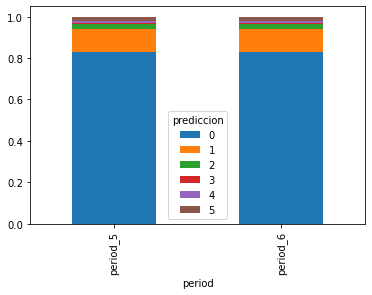

In [127]:
%%time
u1 = pd.DataFrame(yprob_test['clase_th'].values , columns = ['prediccion'])
u1['period']   = 'period_5'

u2 = pd.DataFrame(yprob_oot['clase_th'].values , columns = ['prediccion'])
u2['period']   = 'period_6'
#np.argmax(prediccion_lgb_oot, axis=1)])
u = pd.concat([u1,u2])
z = u.value_counts(['period', 'prediccion']).unstack()
(z/pd.DataFrame(z.sum(axis = 1)).values).plot.bar(stacked = True)
(z/pd.DataFrame(z.sum(axis = 1)).values)*100

attrition,-1,0,1,2,3,4,5
period,,,,,,,
period_1,NaN,87.301587,8.457884,0.938478,0.579307,1.274476,1.448268
period_2,NaN,86.568182,8.829545,1.113636,0.619318,1.352273,1.517045
period_3,NaN,87.728783,8.081320,0.951737,0.580053,1.205159,1.452948
period_4,NaN,86.605158,8.776123,1.161627,0.672521,1.194976,1.589595
period_5,NaN,86.178194,8.668748,1.199277,0.750233,1.221182,1.982367
period_6,NaN,85.612061,9.553723,1.048779,0.666412,1.403835,1.715191
period_7,100.0,NaN,NaN,NaN,NaN,NaN,NaN
period_8,100.0,NaN,NaN,NaN,NaN,NaN,NaN
period_9,100.0,NaN,NaN,NaN,NaN,NaN,NaN


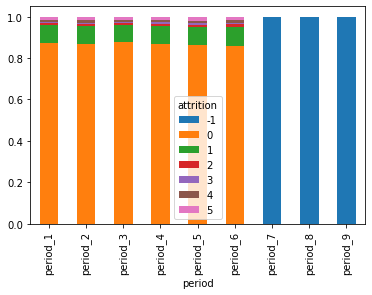

In [128]:
z = consolidado.value_counts(['period', 'attrition']).unstack()
(z/pd.DataFrame(z.sum(axis = 1)).values).plot.bar(stacked = True)
(z/pd.DataFrame(z.sum(axis = 1)).values)*100